# Diffusion

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up parameters

### Setting Fourier component for initial density

In [236]:
def set_up_component(parameters):
    A = np.array(parameters['left_boundary_condition'])
    B = np.array(parameters['right_boundary_condition'])
    L = np.array(parameters['thickness'])
    D = np.array(parameters['diffusion_constant'])
    K = np.array(parameters['constant_initial_density'])
    n_component = parameters['number_of_component_considered']
    component = np.array([0.0]*n_component)
    if parameters['initial_density_type'] == 'test':
        component = np.array([0]*n_component)
        component[0] = -2.0
        component[1] = -1.0
        component[2] = -0.50
    elif parameters['initial_density_type'] == 'constant':
        for i in range(1, n_component+1):
            component[i-1] = 2.0/i/np.pi*((K-A)-((-1)**i)*(K-B) )
    else:
        raise Exception
    parameters['component'] = component

### Parameters setup

In [273]:
parameters = {'left_boundary_condition' : 2,
              'right_boundary_condition' : 3,
              'thickness' : 10,
              'diffusion_constant' : 0.1,
              'number_of_component_considered' : 20,
              'constant_initial_density' : 1,
              'initial_density_type' : 'constant',
}
set_up_component(parameters)

n_x = 20
n_t = 20
t_max = 300
depth = parameters['thickness']/(n_x-1)*np.array(range(n_x))
time = t_max/(n_t-1)*np.array(range(n_t))

### Density over time and space

In [274]:
def density(parameters, x, t):
    A = np.array(parameters['left_boundary_condition'])
    B = np.array(parameters['right_boundary_condition'])
    L = np.array(parameters['thickness'])
    D = np.array(parameters['diffusion_constant'])
    K = np.array(parameters['constant_initial_density'])
    n_component = parameters['number_of_component_considered']
    component = parameters['component']    
    
    tmp = np.array(0.0)
    for i in range(1, n_component+1):
        tmp += component[i-1]*np.sin(i*np.pi*x/L)*np.exp(-((i*np.pi/L)**2)*D*t)

    return x*(B-A)/L + A + tmp  

### calculate density

In [275]:
d = np.zeros((n_t, n_x))
for i in range(n_t):
    for j in range(n_x):
        d[i,j] = density(parameters,depth[j],time[i])

### plot the density over time

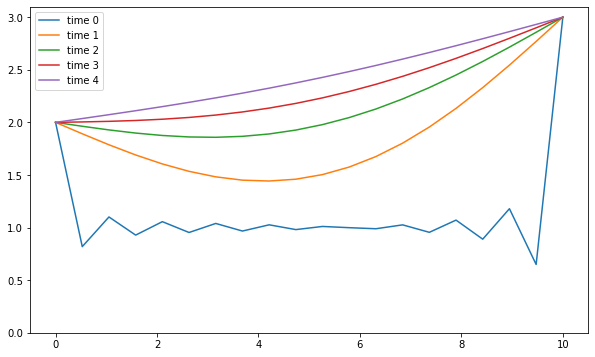

In [276]:
plt.figure(figsize=(10,6))


plt.plot(depth,d[0,:], label='time 0')

plt.plot(depth,d[1*int(n_t/5),:], label='time 1')

plt.plot(depth,d[2*int(n_t/5),:], label='time 2')
plt.plot(depth,d[3*int(n_t/5),:], label='time 3')
plt.plot(depth,d[-1,:], label='time 4')


plt.ylim((0,0.1+max(parameters['left_boundary_condition'],parameters['right_boundary_condition'])))
plt.legend()
plt.show()

# XPS Intensity over time

In [277]:
decay_length = np.array(5)
gamma = -1.0/decay_length

In [282]:
def intensity(parameters, gamma, time, normalization=True):
    A = np.array(parameters['left_boundary_condition'])
    B = np.array(parameters['right_boundary_condition'])
    L = np.array(parameters['thickness'])
    D = np.array(parameters['diffusion_constant'])
    n_component = parameters['number_of_component_considered']
    component = parameters['component']
    t = np.array(time)

    tmp = np.array(0.0)
    for i in range(1, n_component+1):
        tmp += component[i-1]*np.exp(-D*t*(i*np.pi/L)**2)*(i*np.pi/L/(gamma**2+(i*np.pi/L)**2))*(1.0+((-1)**(i+1))*np.exp(-gamma*L))
    
    static = (B-A)/(L*gamma**2)*(1.0-gamma*L*np.exp(-gamma*L)-np.exp(-gamma*L))+A/gamma*(1.0-np.exp(-gamma*L))
    return 1 + tmp/static if normalization else static + tmp



### Calculate intensity over time

In [290]:
I = np.zeros((n_t))
for i in range(n_t):
    I[i] = intensity(parameters, gamma, time[i])

### Plot intensity over time

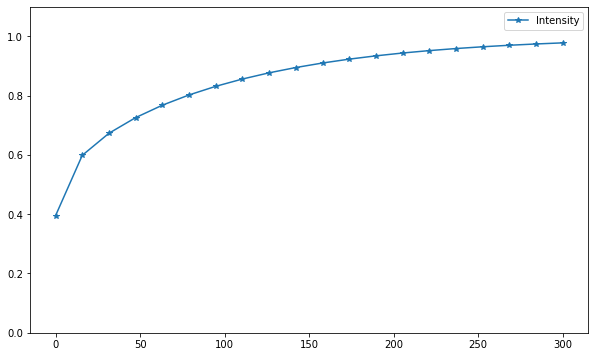

In [291]:
plt.figure(figsize=(10,6))


plt.plot(time,I, label='Intensity', marker='*')
# plt.plot(time,I10, label='Intensity', marker='o')
# plt.plot(time,I1_100, label='Intensity', marker='')


plt.ylim((0,1.1))

plt.legend()
plt.show()

In [292]:
stop here

SyntaxError: invalid syntax (Temp/ipykernel_16060/4067800170.py, line 1)

In [ ]:
#I10 = I
# I1_100 = I

# Plot Note


In [ ]:
n = 20
x = np.array(list(range(n)))/n
y = (np.array(list(range(n))))**2
y2 = np.array(list(range(n)))+3
y3 = np.random.rand(n)

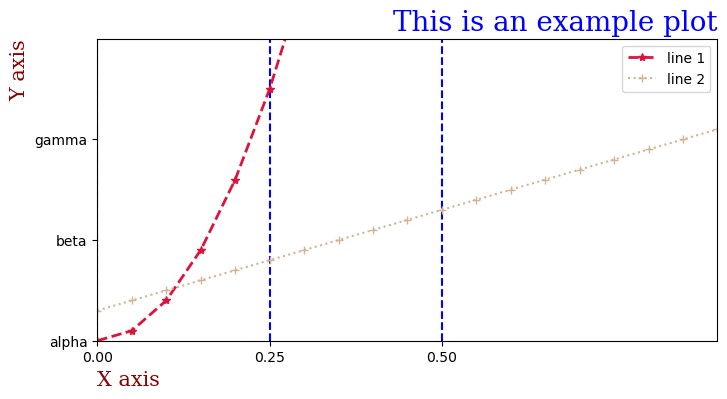

In [ ]:
# figure size
plt.figure(figsize=(8, 4), dpi=100)


# plot data and set up line/point style
plt.plot(x,y,marker='*', linestyle='--', color='Crimson', linewidth=2, label='line 1')
plt.plot(x,y2,marker='+', linestyle=':', color='#d3b492', linewidth=1.5, label='line 2')


# set up fonts
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
# title and labels
plt.title('This is an example plot', fontdict=font1, loc='right')
plt.xlabel('X axis', fontdict=font2, loc='left')
plt.ylabel('Y axis', fontdict=font2, loc='top')


# grid lines
plt.grid(axis='x', color='blue', linewidth=1.5, linestyle='--')


# set domain and range, and their tics
plt.xlim(0,0.9)
plt.ylim(0,30)
plt.xticks([0,0.25,0.5])
plt.yticks([0,10,20], ['alpha', 'beta', 'gamma'])


# legends
plt.legend(loc='upper right')


# save figure (must locate before plt.show()!)
plt.savefig('fig_save_test.png', dpi=300)
plt.savefig('fig_save_test.pdf')  # for vectorized figure


# show the plotted figure
plt.show()

 

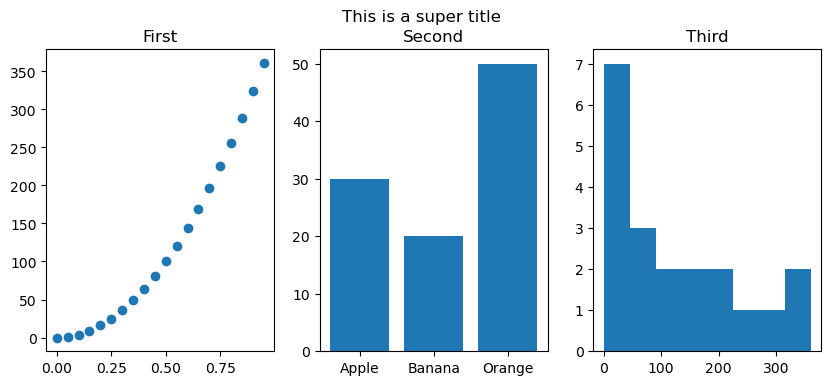

In [ ]:
plt.figure(figsize=(10, 4), dpi=100)

plt.subplot(1,3,1)
plt.scatter(x,y)
plt.title('First')

plt.subplot(1,3,2)
plt.bar(['Apple', 'Banana', 'Orange'], [30,20,50])
plt.title('Second')

plt.subplot(1,3,3)
plt.hist(y,bins=8)
plt.title('Third')

plt.suptitle('This is a super title')
plt.show()